In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Regression models
## Live

In [3]:
num_points = 200
x = np.linspace(-3, 5, num_points)
y_noise = np.random.normal(loc = 0, scale=1,size = num_points)
y = 2 * x + 3
y += y_noise

Text(0, 0.5, 'y (output)')

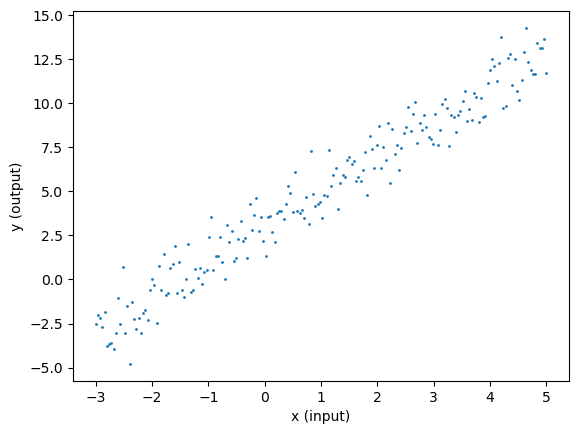

In [4]:
plt.scatter(x, y, s=1)
plt.xlabel('x (input)')
plt.ylabel('y (output)')

In [5]:
np.corrcoef(x, y)

array([[1.        , 0.97510341],
       [0.97510341, 1.        ]])

In [6]:
data = pd.DataFrame({"x": x, "y": y})

In [7]:
x = data.x.values
y = data.y.values

In [8]:
# y = ax + b
a = 5 
b = 3

In [9]:
def plot_model(x, y, a, b):
  y_model = a * x + b
  plt.scatter(x, y, s= 5)
  plt.plot(x, y_model, c ='r', label = f"y = {a}x + {b}")
  plt.xlabel('x (input)')
  plt.ylabel('y (output)')
  plt.legend()
  plt.show()

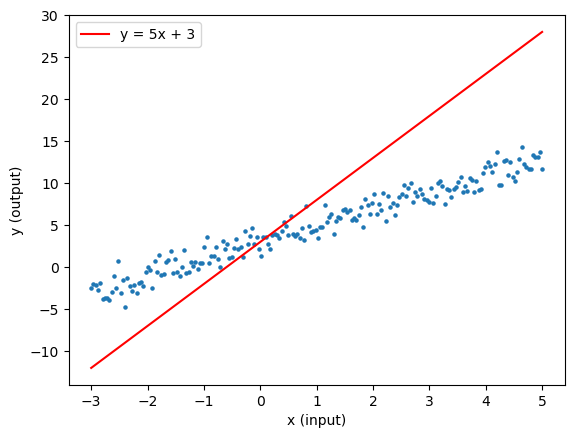

In [10]:
plot_model(x, y, a, b)

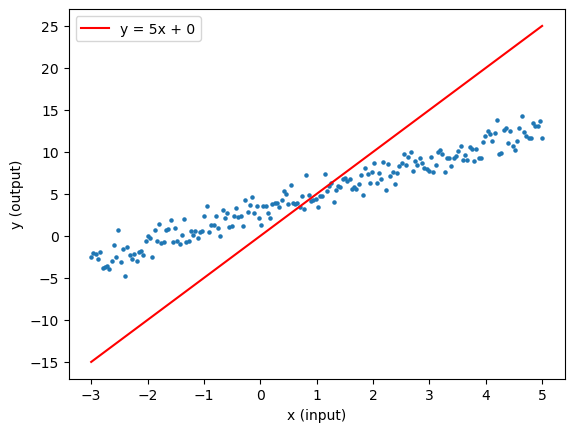

In [11]:
plot_model(x, y, 5, 0)

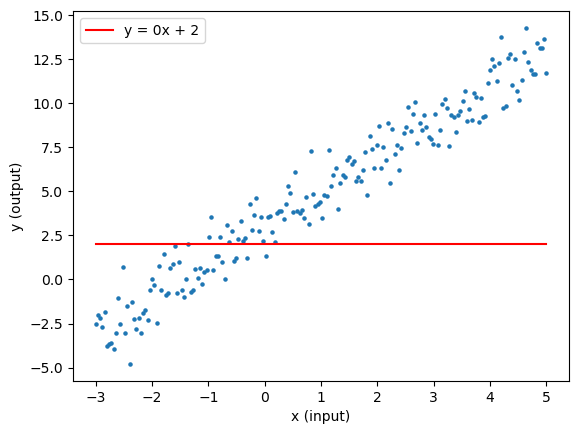

In [12]:
plot_model(x, y, 0, 2)

In [13]:
# mean squared error
# y = observed
# y_model = estimated
def mse(y, y_model):
  return ((y - y_model) ** 2).mean()

def plot_model(x, y, a, b):
  y_model = a * x + b
  model_mse = mse(y, y_model)

  plt.scatter(x, y, s= 5)
  plt.plot(x, y_model, c ='r', label = f"y = {a}x + {b}; mse: {model_mse}")
  plt.xlabel('x (input)')
  plt.ylabel('y (output)')
  plt.legend()
  plt.show()

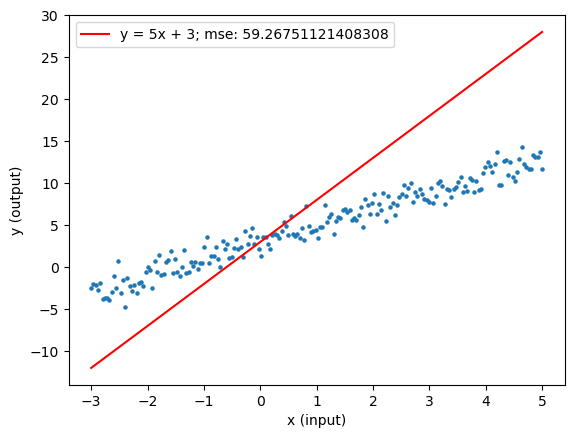

In [14]:
plot_model(x, y, 5, 3)

In [15]:
n_trials = 100
random_a = np.random.uniform(-5, 5, n_trials)
random_b = np.random.uniform(-5, 5, n_trials)

In [16]:
min_mse, best_a, best_b = 1e10, 0, 0

for current_a in random_a:
  for current_b in random_b:
    y_model = current_a * x + current_b
    current_mse = mse(y, y_model)

    if current_mse < min_mse:
      min_mse = current_mse
      best_a = current_a
      best_b = current_b

min_mse

1.1032937192689904

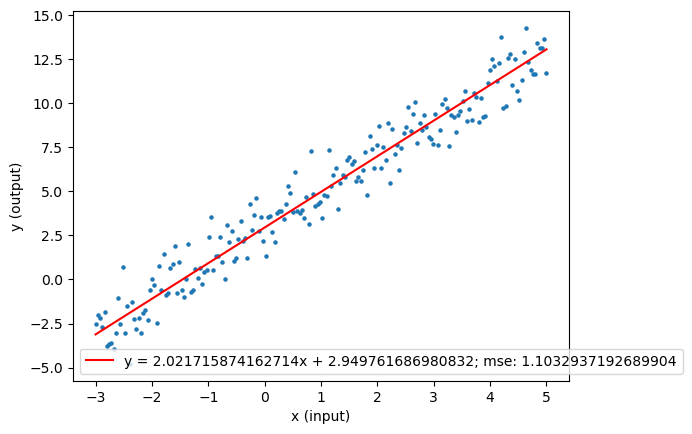

In [17]:
plot_model(x, y, best_a, best_b)

In [18]:
a, b =5, 18
alpha = 0.001
a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(y) * np.sum(y - (a * x + b))

In [19]:
y_tilde = a * x + b
mse(y, y_tilde)

374.8766614140139

In [20]:
(a_gradient, b_gradient)

(68.55097472346561, 36.04061001332872)

In [21]:
new_a = a - a_gradient * alpha

In [22]:
new_b = b - b_gradient * alpha

In [23]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

368.9147535860183

In [24]:
a_gradient = -2 / len(x) * np.sum(x * (y - (new_a * x + new_b)))
b_gradient = -2 / len(y) * np.sum(y - (new_a * x + new_b))
new_a = new_a - a_gradient * alpha
new_b = new_b - b_gradient * alpha
y_tilde = new_a * x + new_b
mse(y, y_tilde)

363.0959834992612

In [25]:
def perform_gradient_descent(x, y, a, b, learning_rate):
  a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
  b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
  new_a = a - a_gradient * learning_rate
  new_b = b - b_gradient * learning_rate
  return (new_a, new_b)


In [26]:
model_a, model_b = -10, 20 # Start points; can be anywhere
alpha = 0.01 # Learning rate
all_errors = []
for step in range(1001):
  model_a, model_b = perform_gradient_descent(x, y, model_a, model_b, alpha)
  y_model = model_a * x + model_b
  error = mse(y, y_model)
  all_errors.append(error)
  if step % 100 == 0:
    print("Step {}: a = {}, b = {}, J = {}".format(step, model_a, model_b, error))
    
print("Final line: {} * x + {}".format(model_a, model_b)) 

Step 0: a = -8.809429345224606, b = 19.899593899866712, J = 665.8237902123781
Step 100: a = 1.3554844288676475, b = 6.4874023851731115, J = 11.41053199476613
Step 200: a = 1.8625860367235376, b = 3.664614765733855, J = 1.4721309377400216
Step 300: a = 1.9595537825143234, b = 3.1248362215349563, J = 1.1087258302621585
Step 400: a = 1.9780961230972802, b = 3.0216188318270905, J = 1.0954376492573648
Step 500: a = 1.9816418216334915, b = 3.0018814234906754, J = 1.0949517569273377
Step 600: a = 1.9823198362591767, b = 2.998107202025272, J = 1.0949339899089403
Step 700: a = 1.9824494873922185, b = 2.9973854888485905, J = 1.0949333402445536
Step 800: a = 1.9824742795068164, b = 2.9972474816028134, J = 1.0949333164890869
Step 900: a = 1.9824790202979825, b = 2.9972210916178414, J = 1.0949333156204504
Step 1000: a = 1.9824799268402942, b = 2.99721604527913, J = 1.0949333155886878
Final line: 1.9824799268402942 * x + 2.99721604527913


In [27]:
len(all_errors)

1001

Text(0, 0.5, 'Training loss')

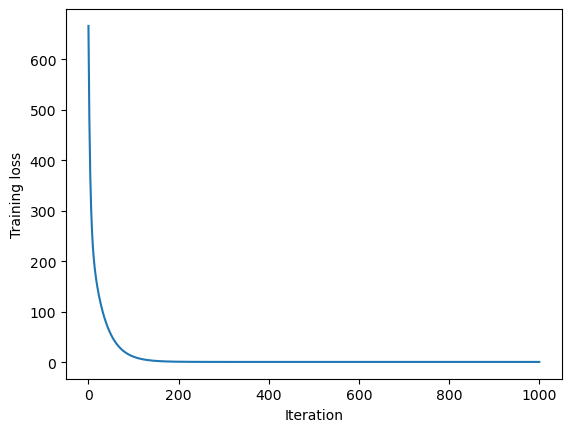

In [28]:
# training curve
plt.plot(all_errors)
plt.xlabel("Iteration")
plt.ylabel("Training loss")

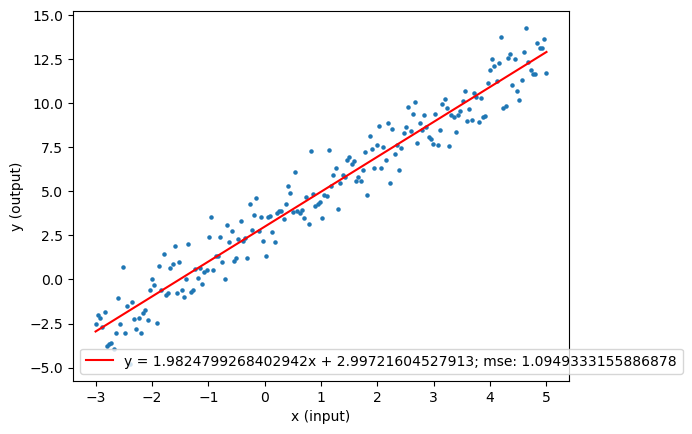

In [29]:
plot_model(x, y, model_a, model_b)

In [30]:
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
print(model.coef_, model.intercept_)

[1.98248014] 2.9972148521589803


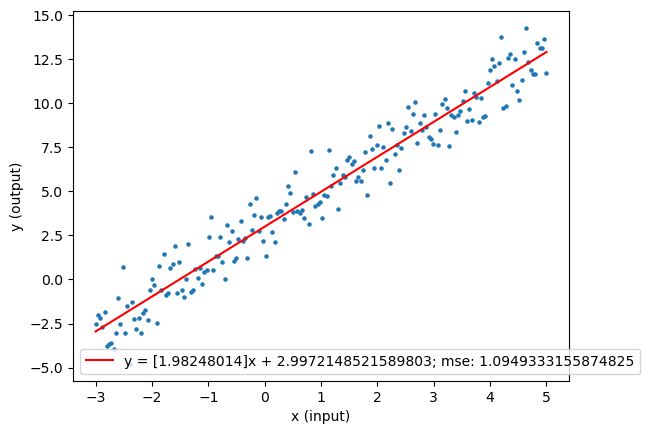

In [31]:
plot_model(x, y, model.coef_, model.intercept_)

In [32]:
x.reshape(-1, 1)

array([[-3.        ],
       [-2.95979899],
       [-2.91959799],
       [-2.87939698],
       [-2.83919598],
       [-2.79899497],
       [-2.75879397],
       [-2.71859296],
       [-2.67839196],
       [-2.63819095],
       [-2.59798995],
       [-2.55778894],
       [-2.51758794],
       [-2.47738693],
       [-2.43718593],
       [-2.39698492],
       [-2.35678392],
       [-2.31658291],
       [-2.27638191],
       [-2.2361809 ],
       [-2.1959799 ],
       [-2.15577889],
       [-2.11557789],
       [-2.07537688],
       [-2.03517588],
       [-1.99497487],
       [-1.95477387],
       [-1.91457286],
       [-1.87437186],
       [-1.83417085],
       [-1.79396985],
       [-1.75376884],
       [-1.71356784],
       [-1.67336683],
       [-1.63316583],
       [-1.59296482],
       [-1.55276382],
       [-1.51256281],
       [-1.47236181],
       [-1.4321608 ],
       [-1.3919598 ],
       [-1.35175879],
       [-1.31155779],
       [-1.27135678],
       [-1.23115578],
       [-1

In [33]:
predicted = model.predict(x.reshape(-1, 1))

In [34]:
r2_score(y, predicted)

0.9508266694168473

In [35]:
mean_squared_error(y, predicted)

1.0949333155874825

In [36]:
mean_absolute_error(y, predicted)

0.8549696272083156

In [37]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [38]:
print(load_wine()["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [39]:
wine = load_wine()
wine_data = wine['data']
wine_labels = wine['target']

In [40]:
wine_data.shape

(178, 13)

In [41]:
wine_data = pd.DataFrame(wine_data)
wine_data.columns = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash  ", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [42]:
wine_data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [43]:
logistic_regression = LogisticRegression()

In [44]:
logistic_regression.fit(wine_data, wine_labels)

c:\Users\7h3ph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# same as accuracy_score from sklearn
pred = logistic_regression.predict(wine_data)
accuracy = (pred == wine_labels).sum() / len(wine_labels)
accuracy

0.9662921348314607

In [46]:
accuracy_score(wine_labels, pred)

0.9662921348314607

In [47]:
wine_data_train, wine_data_test, wine_labels_train, wine_labels_test = train_test_split(wine_data, wine_labels)

In [48]:
print(len(wine_data))
print((len(wine_data_train), len(wine_data_test)))

178
(133, 45)


In [49]:
print(len(wine_labels))
print((len(wine_labels_train), len(wine_labels_test)))

178
(133, 45)


In [50]:
new_lr = LogisticRegression()

In [51]:
new_lr.fit(wine_data_train, wine_labels_train)

c:\Users\7h3ph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
new_lr.score(wine_data_train, wine_labels_train)

0.9548872180451128

In [52]:
new_lr.score(wine_data_test, wine_labels_test)

0.9777777777777777